# Homework 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

<span style="color:red">1. Computationally Intensive - if there are 1,000 Securities, there would be 1,000 x 1,000 covariance matrix. Computation, storage and inversion of this large matrix might be infeasible.</span> <br>
<span style="color:red">2. High Dimensionality can cause numerical instability / ill-conditioning of covariance matrix when inverted. This means that small errors and noise in the input can result in large errors in the optimized weights.</span> <br>
<span style="color:red">3. From a practical viewpoint, transacting 1,000 securities can be difficult to manage for the PM, especially if the weights of each stock is very small. Furthermore, there might be higher transaction costs associated with this.</span> <br>

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

<!-- <span style="color:red"> Each security can only exist in a single partition; i.e. no intersect between each partition. </span> <br>
<span style="color:red"> All securities must also be in a partition, such that the partitions in union, make up all 1000 securities. </span> <br> -->
<span style="color:red"> Asset Classes should be constructed to have low correlation with each other. </span> <br>
<span style="color:red"> That is to say that the covariance between securities in different asset class buckets should not be stable, to ensure that the MV Optimization can maximise the benefits of diversification between different asset class buckets. </span> <br>

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

<span style="color:red"> TIPS can be placed together with domestic bonds, as it is expected to have similar charactersitics as bonds - Fixed income, low risk. TIPS also has a high correlation with bonds, during times of stable inflation. </span> <br>
<span style="color:red"> TIPS can also be placed in its own asset class, due to its special characteristic of being able to manage inflation risk more explicity. It also allows diversification of FI asset class, having this security as its own bucket means that there is increased risk diversification among asset classes.  </span> <br>

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?
<span style="color:red"> More accurate measure of returns, after accounting for inflation </span> <br>
<span style="color:red"> Does change the MV Solution,  as using real returns will affect securities which are more sensitive to inflation, such as TIPS, commodities and real estate. </span> <br>
<span style="color:red">Using nominal returns will make the MV optimization ignore the sensitivies of the aforementioned securities w.r.t inflation. </span> <br>
<span style="color:red">This causes sub-optimal allocation which does not hedge optimally against inflation. </span> <br>


### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

$$\min_{\omega}\;  \omega^{'} \Sigma \omega $$
$$s.t.\; \omega^{'}\tilde{\mu}=\tilde{\mu^{p}}$$
$$L_{i}\leq \omega_{i}\leq U_{i},\; \text{where }L_{i}\text{ is the lower limit and } U_{i} \text{ is the upper limit for asset } i$$
<span style="color:red">This makes the MV Optimization more complex </span> <br>

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

<span style="color:red">Risk Return tradeoff for domestic equities and bonds are relatively lower compared to asset classes, hence the MV Optimization does not allocate assets to it. In fact, if there was no constraint, then the optimization will suggest shorting these assets so as to increase exposure to other asset classes, in particular, TIPS. This is due to the favourable Sharpe of TIPS, can be attributed to its property of being a good inflation hedge. </span> <br>

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

<span style="color:red"> Given stricter constraints means that more risk has to be taken to achieve similar returns. This can be seen as the Sharpe Ratio for the portfolio with stricter constraints is lower compared to the 0 constraint porfolio. Generally, the Sharpe drops from 0.38 to 0.35, almost a 10% deterioration in Sharpe. </span> <br>

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. </i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

***

In [708]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from pathlib import Path
### Insert your file data path below (r.c., copy path)
DATA_FILEPATH = Path(fr"/Users/gelo/REPOS/finm-portfolio-2024/data/multi_asset_etf_data.xlsx")

## <span style= "color:red"> Helper Functions<span>

In [709]:
# This functions takes in excess/total returns, calcs mean/vol/sharpe, then annualizes it
def get_summary_stats(ret_df, period_factor=12):
    if type(ret_df) == pd.Series:
        summary_stats_df = pd.DataFrame(index=[ret_df.name])
    else:
        summary_stats_df = pd.DataFrame(index=ret_df.columns)
    summary_stats_df['Mean'] = ret_df.mean() * period_factor
    summary_stats_df['Vol'] = ret_df.std() * np.sqrt(period_factor)
    summary_stats_df['Sharpe'] = (ret_df.mean()/ret_df.std()) * np.sqrt(period_factor)
    
    return summary_stats_df


In [710]:
# This Function prints the min and max correlation pairs, and their values
def get_maxmin_corr_pair_value(corr_matrix):
    np.fill_diagonal(corr_matrix.values, np.nan)  # Make diagonal 0 so that we dont get it for max
    max_corr_pair = corr_matrix.unstack().idxmax()
    max_corr_value = corr_matrix.unstack().max()
    min_corr_pair = corr_matrix.unstack().idxmin()
    min_corr_value = corr_matrix.unstack().min()
    print(f"The two items with the highest correlation are: {max_corr_pair}, with correlation value: {max_corr_value:.2f}")
    print(f"The two items with the lowest correlation are: {min_corr_pair}, with correlation value: {min_corr_value:.2f}")

In [711]:
# This Function gets the tangency weights given the monthly returns df
def get_tangency_weights(returns, method=None):
    cov_matrix = returns.cov() * 12
    if method == 'regularized':
        cov_diag = np.diag(np.diag(cov_matrix))
        cov_matrix = (cov_matrix + cov_diag)
        cov_matrix = 0.5 * cov_matrix
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    mu = returns.mean() * 12
    ones = np.ones(returns.columns.shape[0])
    scaler = 1/(np.transpose(ones) @ cov_matrix_inv @ mu)
    tangency_weights = scaler * (cov_matrix_inv @ mu)
    tangency_weights = pd.DataFrame(index = returns.columns, data = tangency_weights, columns=['Tangent Weights'])
    
    return tangency_weights

In [712]:
# This Function gets the GMV weights given the monthly returns df
def get_gmv_weights(returns):
    cov_matrix = returns.cov() * 12
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    ones = np.ones(returns.columns.shape[0])
    scaler = 1/(np.transpose(ones) @ cov_matrix_inv @ ones)
    gmv_weights = scaler * (cov_matrix_inv @ ones)
    gmv_weights = pd.DataFrame(index = returns.columns, data = gmv_weights, columns=['GMV Weights'])
    
    return gmv_weights

In [713]:
# This function gets the tan and gmv weights, and given a target mean, will return the MV portfolio
def get_mv_portfolio(target_mean, total_ret):
    
    tan_weights = get_tangency_weights(total_ret)
    gmv_weights = get_gmv_weights(total_ret)
    tan_mu =  total_ret.mean() @ tan_weights
    gmv_mu = total_ret.mean() @ gmv_weights
    
    # Measure from gmv, the lower target-gmv (delta), the closer target is to gmv, hence a higher weight to gmv
    delta = (target_mean-gmv_mu.iloc[0])/(tan_mu.iloc[0]-gmv_mu.iloc[0])
    # Lower delta -> higher weight to gmv
    mv_weights = ((1-delta) * gmv_weights).values + (delta * tan_weights).values
    reshaped_data = [list(tan_weights['Tangent Weights'].values), list(gmv_weights['GMV Weights'].values), list(mv_weights.reshape(11))]
    mv_weights = pd.DataFrame(index = total_ret.columns, data = np.array(reshaped_data).T, columns=['Tangency Weights', 'GMV Weights', 'MV Weights'])
    
    return mv_weights

## <span style= "color:red"> 2.1<span>

In [714]:
multi_asset_etf_prices = pd.read_excel(DATA_FILEPATH, sheet_name='prices')
multi_asset_etf_exc_ret = pd.read_excel(DATA_FILEPATH, sheet_name='excess returns', index_col=0)

summary_stats_df = get_summary_stats(multi_asset_etf_exc_ret)
summary_stats_df

,Mean,Vol,Sharpe
BWX,-0.011888,0.081671,-0.145563
DBC,-0.009086,0.168455,-0.053935
EEM,0.026960,0.179940,0.149829
EFA,0.055037,0.152203,0.361605
HYG,0.037356,0.077289,0.483335
IEF,0.013939,0.063197,0.220561
IYR,0.077912,0.169585,0.459426
PSP,0.092851,0.215238,0.431386
QAI,0.014959,0.049007,0.305241
SPY,0.126983,0.143066,0.887578


In [715]:
print(f"Best return: {summary_stats_df['Sharpe'].idxmax()}")
print(f"Worst return: {summary_stats_df['Sharpe'].idxmin()}")

Best return: SPY
Worst return: BWX


## <span style= "color:red"> 2.2<span>

The two items with the highest correlation are: ('EFA', 'PSP'), with correlation value: 0.91
The two items with the lowest correlation are: ('DBC', 'IEF'), with correlation value: -0.30


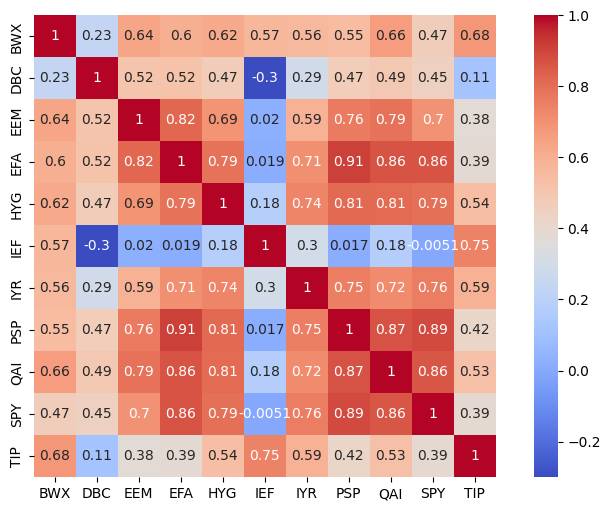

In [716]:
# Get Covariance Matrix
corr_matrix = multi_asset_etf_exc_ret.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            square=True, xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns)
get_maxmin_corr_pair_value(corr_matrix.copy(deep=True))

<span style='color:red'>TIPS has a higher Sharpe in comparison to Domestic Bonds (IEF) and Foreign bonds (BWX) - indicating that it has outperformed these two securities.<span>
<span style='color:red'>TIPS has about the median (6th) Sharpe. On an absolute basis, TIPS also has a very low mean and volatility relative to most other securities.<span>

## <span style= "color:red"> 2.3<span>

In [717]:
tangency_weights = get_tangency_weights(multi_asset_etf_exc_ret)
tangency_weights = tangency_weights.sort_values(by='Tangent Weights')
tangency_weights = pd.merge(tangency_weights, summary_stats_df['Sharpe'], left_index=True, right_index=True).rename_axis('Assets')
tangency_weights

,Tangent Weights,Sharpe
Assets,,
SPY,-4.904086,0.887578
IEF,-4.682480,0.220561
HYG,-0.832578,0.483335
EEM,-0.615698,0.149829
DBC,-0.111241,-0.053935
PSP,0.277002,0.431386
TIP,0.510436,0.328618
EFA,0.530692,0.361605
IYR,0.877108,0.459426


<span style='color:red'>We can see from the above that the ranking based on Tangent Weights does not necessarily follow the Sharpe Ratio rankings. <span>

In [718]:
### Get the returns of tangent portfolio
tan_wts = tangency_weights['Tangent Weights'].loc[multi_asset_etf_exc_ret.columns]
tan_rets =  (multi_asset_etf_exc_ret @ tan_wts)
tan_rets.name = 'Tangent Portfolio'
tan_pfolio_summary_stats = get_summary_stats(tan_rets)
tan_pfolio_summary_stats

,Mean,Vol,Sharpe
Tangent Portfolio,-0.527276,0.328513,-1.605037


## <span style= "color:red"> 2.4<span>

In [719]:
### Drop Tips
multi_asset_etf_exc_ret_noTIPS = multi_asset_etf_exc_ret.drop(columns=['TIP'])
tangency_weights_noTIPS = get_tangency_weights(multi_asset_etf_exc_ret_noTIPS)
print(tangency_weights_noTIPS)
tan_rets_noTIPS = multi_asset_etf_exc_ret_noTIPS @ (tangency_weights_noTIPS['Tangent Weights'].loc[multi_asset_etf_exc_ret_noTIPS.columns])
tan_rets_noTIPS.name = 'Tangent Portfolio (TIPS Removed)'
tan_pfolio_noTIPS_summary_stats = get_summary_stats(tan_rets_noTIPS)
tan_pfolio_noTIPS_summary_stats

     Tangent Weights
BWX         3.015911
DBC        -0.090968
EEM        -0.664230
EFA         0.540606
HYG        -0.871637
IEF        -4.832385
IYR         0.990156
PSP         0.324898
QAI         7.976911
SPY        -5.389260


,Mean,Vol,Sharpe
Tangent Portfolio (TIPS Removed),-0.580806,0.362125,-1.603881


In [720]:
### Adjust TIPS +0.0012
TIPS_adj = 0.0012
multi_asset_etf_exc_ret_adjTIPS = multi_asset_etf_exc_ret.copy()
multi_asset_etf_exc_ret_adjTIPS['TIP'] += TIPS_adj
tangency_weights_adjTIPS = get_tangency_weights(multi_asset_etf_exc_ret_adjTIPS)
print(tangency_weights_adjTIPS)
tan_rets_adjTIPS = multi_asset_etf_exc_ret_adjTIPS @ (tangency_weights_adjTIPS['Tangent Weights'].loc[multi_asset_etf_exc_ret_adjTIPS.columns])
tan_rets_adjTIPS.name = 'Tangent Portfolio (TIPS Adjusted)'
tan_pfolio_adjTIPS_summary_stats = get_summary_stats(tan_rets_adjTIPS)
tan_pfolio_adjTIPS_summary_stats

     Tangent Weights
BWX        29.260095
DBC         1.771624
EEM        -5.123028
EFA         1.451443
HYG        -4.460119
IEF       -18.604613
IYR        11.376147
PSP         4.725247
QAI        77.462118
SPY       -49.963644
TIP       -46.895270


,Mean,Vol,Sharpe
Tangent Portfolio (TIPS Adjusted),-6.174021,3.655768,-1.688844


In [721]:
### Concat 3 scenarios
pd.concat([tan_pfolio_summary_stats, tan_pfolio_noTIPS_summary_stats, tan_pfolio_adjTIPS_summary_stats])

,Mean,Vol,Sharpe
Tangent Portfolio,-0.527276,0.328513,-1.605037
Tangent Portfolio (TIPS Removed),-0.580806,0.362125,-1.603881
Tangent Portfolio (TIPS Adjusted),-6.174021,3.655768,-1.688844


<span style='color:red'> - We can see from the the above that the presence of tips, given current historic data, does not impact the tangent portfolio as much, compared to if it was dropped. <span>

<span style='color:red'> - The adjustment of TIPS monthly excess mean return by 0.0012 moderately impacts the Sharpe ratio of the tangent portfolio, further improving  it. An argument can be made to include TIPS if it continues to perform well in the future. <span>

<span style='color:red'> - In conclusion, I would lean to including TIPS if it does not increase the operational cost and complexity of managing the portfolio substantially. It brings improved diversification benefits, given its much lower correlation with majority of the asset classes. <span>

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mu$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

## <span style= "color:red"> 3<span>

In [722]:
target_mean = 0.01
excess_ret = multi_asset_etf_exc_ret
tangency_weights_noTIPS.loc['TIP'] = 0
weights = pd.DataFrame(index=excess_ret.columns, columns=['tangency', 'tangency_TIPS_dropped',
                                                          'tangency_TIPS_adjusted', 'equal_weighted',
                                                          'risk_parity', 'regularized'])
weights.loc[:, 'tangency'] = tangency_weights['Tangent Weights'].loc[excess_ret.columns]
weights.loc[:, 'tangency_TIPS_dropped'] = tangency_weights_noTIPS['Tangent Weights'].loc[excess_ret.columns]
weights.loc[:, 'tangency_TIPS_adjusted'] = tangency_weights_adjTIPS['Tangent Weights'].loc[excess_ret.columns]
weights.loc[:, 'equal_weighted']  = 1 / len(excess_ret.columns)
weights.loc[:, 'risk_parity'] = 1 / (excess_ret.var().loc[excess_ret.columns])
weights.loc[:,  'regularized'] = get_tangency_weights(excess_ret, method='regularized').loc[excess_ret.columns].values

scaler = target_mean/(excess_ret.mean() @ weights)
weights *= scaler
weights


,tangency,tangency_TIPS_dropped,tangency_TIPS_adjusted,equal_weighted,risk_parity,regularized
BWX,-0.621364,-0.623116,-0.63855,0.271575,0.522879,-0.675374
DBC,0.025317,0.018795,-0.038663,0.271575,0.122905,-0.136195
EEM,0.140124,0.137236,0.111801,0.271575,0.107717,-0.066165
EFA,-0.120777,-0.111694,-0.031675,0.271575,0.150554,0.037302
HYG,0.189482,0.180089,0.097334,0.271575,0.583857,0.316781
IEF,1.065661,0.998417,0.406013,0.271575,0.873276,0.393506
IYR,-0.199617,-0.204576,-0.248264,0.271575,0.121273,0.080277
PSP,-0.063041,-0.067127,-0.10312,0.271575,0.075284,0.049547
QAI,-1.643297,-1.648106,-1.690473,0.271575,1.452202,-0.1565
SPY,1.116095,1.113473,1.090368,0.271575,0.170397,0.623712


In [723]:
get_summary_stats(excess_ret @ weights)

,Mean,Vol,Sharpe
tangency,0.12,0.074765,1.605037
tangency_TIPS_dropped,0.12,0.074818,1.603881
tangency_TIPS_adjusted,0.12,0.079781,1.504124
equal_weighted,0.12,0.291527,0.411625
risk_parity,0.12,0.309515,0.387703
regularized,0.12,0.102604,1.169541


<span style='color:red'> - Tangency MV portfolio performs the best in terms of Sharpe, as expected. <span>


***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

## <span style='color:red'> OOS/IS Performance <span>


In [724]:
cutoff_date = '2022'
train_df = excess_ret.loc[:cutoff_date]
test_df = excess_ret.loc[cutoff_date:]

In [725]:
target_mean = 0.01
weights_IS = pd.DataFrame(index=excess_ret.columns, columns=['tangency', 'equal_weighted',
                                                          'risk_parity', 'regularized'])
weights_IS.loc[:, 'tangency'] = get_tangency_weights(train_df).loc[train_df.columns]
weights_IS.loc[:, 'equal_weighted']  = 1 / len(train_df.columns)
weights_IS.loc[:, 'risk_parity'] = 1 / (train_df.var().loc[train_df.columns])
weights_IS.loc[:,  'regularized'] = get_tangency_weights(train_df, method='regularized').loc[train_df.columns].values
scaler = target_mean/(train_df.mean() @ weights_IS)
weights_IS *= scaler
weights_IS


,tangency,equal_weighted,risk_parity,regularized
BWX,-0.503524,0.309565,0.639716,-0.761197
DBC,0.08093,0.309565,0.123943,-0.07458
EEM,0.147145,0.309565,0.113883,-0.0774
EFA,0.004029,0.309565,0.159796,0.031962
HYG,0.169096,0.309565,0.602384,0.314257
IEF,1.097351,0.309565,1.061008,0.604003
IYR,-0.196155,0.309565,0.139895,0.114358
PSP,-0.248833,0.309565,0.082945,0.008478
QAI,-1.884884,0.309565,1.560203,-0.303143
SPY,1.203323,0.309565,0.179449,0.637705


In [726]:
print("IS Performance:")
get_summary_stats(train_df @ weights_IS)

IS Performance:


,Mean,Vol,Sharpe
tangency,0.12,0.072139,1.663449
equal_weighted,0.12,0.332157,0.361275
risk_parity,0.12,0.330685,0.362883
regularized,0.12,0.104833,1.144678


In [727]:
print("OOS Performance:")
get_summary_stats(test_df @ weights_IS)

OOS Performance:


,Mean,Vol,Sharpe
tangency,0.065633,0.102313,0.641492
equal_weighted,-0.040734,0.420773,-0.096809
risk_parity,-0.190679,0.518398,-0.367824
regularized,0.036462,0.143128,0.254752


## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

## <span style='color:red'> OOS/IS Performance w/ Annual Rebalancing <span>


In [728]:
start_year = 2015
end_year = 2024
oos_rets = pd.DataFrame(index=excess_ret.loc[str(start_year+1):].index,
                        columns=['tangency', 'equal_weighted',
                                 'risk_parity', 'regularized'], 
                        dtype=float)
target_mean = 0.01

for curr_year in range(start_year, end_year):
    next_year = curr_year + 1
    train_df = excess_ret.loc[:str(curr_year)]
    test_df = excess_ret.loc[str(next_year)]
    
    
    # Calc weights adjusted to target mean
    weights_IS = pd.DataFrame(index=excess_ret.columns, columns=['tangency', 'equal_weighted',
                                                          'risk_parity', 'regularized'])
    weights_IS.loc[:, 'tangency'] = get_tangency_weights(train_df).loc[train_df.columns]
    weights_IS.loc[:, 'equal_weighted']  = 1 / len(train_df.columns)
    weights_IS.loc[:, 'risk_parity'] = 1 / (train_df.var().loc[train_df.columns])
    weights_IS.loc[:,  'regularized'] = get_tangency_weights(train_df, method='regularized').loc[train_df.columns].values
    scaler = target_mean/(train_df.mean() @ weights_IS)
    weights_IS *= scaler
    weights_IS = weights_IS.astype(float)
    
    # Calc returns and append to oos_rets
    oos_rets.loc[str(next_year)] = test_df @ weights_IS
oos_rets
    

,tangency,equal_weighted,risk_parity,regularized
Date,,,,
2016-01-31,0.014769,-0.128134,-0.018617,0.001062
2016-02-29,0.021758,0.002428,0.042232,0.005088
2016-03-31,0.005196,0.252022,0.122578,0.016824
2016-04-30,-0.011659,0.069020,0.039368,-0.016911
2016-05-31,0.011316,-0.004355,-0.020092,0.012406
...,...,...,...,...
2024-05-31,0.032332,0.067663,0.080978,0.042383
2024-06-30,0.058782,0.004394,0.007300,0.032681
2024-07-31,-0.019758,0.066778,0.095959,0.015149


In [729]:
print("OOS Performance (Annual Rebalancing):")

get_summary_stats(oos_rets)

OOS Performance (Annual Rebalancing):


,Mean,Vol,Sharpe
tangency,0.083461,0.091019,0.916962
equal_weighted,0.192450,0.307854,0.625134
risk_parity,0.101025,0.273101,0.369920
regularized,0.059468,0.109011,0.545522


***

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

***

***

## <span style='color:red'> Mean Variance w/o Risk Free asset <span>


In [730]:
total_ret = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name='total returns', index_col=0).drop(columns=['SHV'])
mv_weights = get_mv_portfolio(target_mean, total_ret)
mv_weights

,Tangency Weights,GMV Weights,MV Weights
BWX,-1.288518,-0.128476,-0.733918
DBC,0.035174,-0.006026,0.015477
EEM,0.160416,-0.064773,0.052756
EFA,-0.183479,0.022886,-0.084819
HYG,0.496969,0.112156,0.312995
IEF,1.864395,-0.035441,0.956109
IYR,-0.405635,-0.033271,-0.227613
PSP,-0.285824,-0.122841,-0.207904
QAI,-1.338519,1.140161,-0.153496
SPY,1.836635,-0.116016,0.903099


## <span style='color:red'>  MV frontier w/o risk free asset <span>

In [731]:
omega = mv_weights.loc[:, ['Tangency Weights', 'GMV Weights']].copy()

# Get mean/vol the various MV portfolios in the range specified below
# evenly spaced values between -2, 2
delta_grid = np.linspace(-2,2,150)
mv_df = pd.DataFrame(index=delta_grid, columns=['mean', 'vol'], dtype=float)
for i, delta in enumerate(delta_grid):
    omega_delta = (delta* omega['Tangency Weights'].values) + ((1-delta) * omega['GMV Weights'])
    rets_delta = total_ret @ omega_delta
    mv_df.loc[delta,  'mean'] = np.mean(rets_delta) * 12
    mv_df.loc[delta, 'vol'] = np.std(rets_delta) * np.sqrt(12)
    
# Get mean/vol of tan and gmv portfolios only
tan_gmv_df = pd.DataFrame(index=['tan', 'gmv'], columns=['mean', 'vol'], dtype=float)
tan_gmv_df.loc['tan', 'mean'] = np.mean((total_ret @ omega['Tangency Weights'])) * 12
tan_gmv_df.loc['gmv', 'mean'] = np.mean((total_ret @ omega['GMV Weights'])) * 12
tan_gmv_df.loc['tan', 'vol'] = np.std((total_ret @ omega['Tangency Weights'])) * np.sqrt(12)
tan_gmv_df.loc['gmv', 'vol'] = np.std((total_ret @ omega['GMV Weights'])) * np.sqrt(12)

# Get mean/vol for individual stocks
stocks_df = pd.DataFrame(index=total_ret.columns, columns=['mean', 'vol'], dtype=float)
stocks_df.loc[:, 'mean'] = total_ret.mean().values * 12
stocks_df.loc[:, 'vol'] = total_ret.std().values * np.sqrt(12)

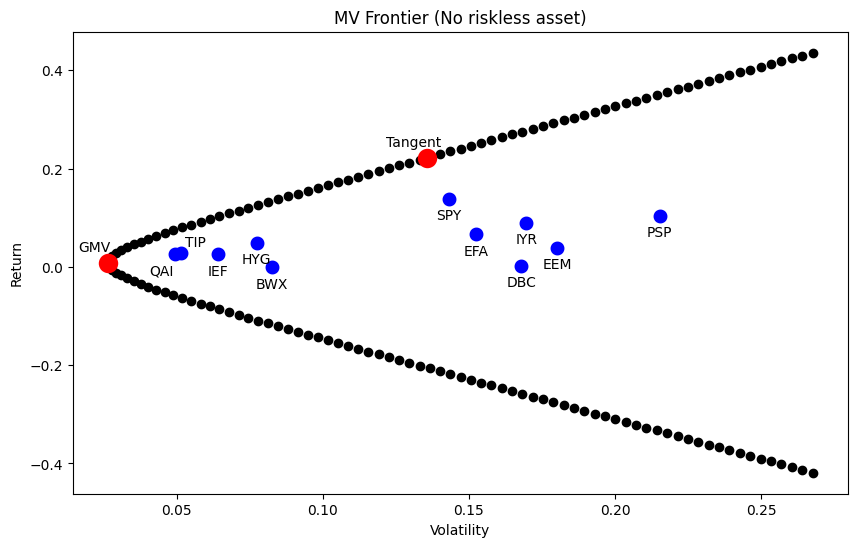

In [732]:
# Plot MV Frontier
plt.figure(figsize=(10, 6))
plt.scatter(mv_df['vol'], mv_df['mean'], c='k', label='MV Portfolios')
plt.scatter(tan_gmv_df['vol'], tan_gmv_df['mean'], c='r', linewidth=8, label='Tangency')
plt.scatter(stocks_df['vol'], stocks_df['mean'], c='b', linewidth=4, label='Individual Stocks')

# Annotate some points
plt.annotate('Tangent', (tan_gmv_df.loc['tan', 'vol'], tan_gmv_df.loc['tan', 'mean']), textcoords="offset points", xytext=(-10,8), ha='center')
plt.annotate('GMV', (tan_gmv_df.loc['gmv', 'vol'], tan_gmv_df.loc['gmv', 'mean']), textcoords="offset points", xytext=(-10,8), ha='center')
for stock in stocks_df.index:
    if stock == 'QAI':
        plt.annotate(stock, (stocks_df.loc[stock, 'vol'], stocks_df.loc[stock, 'mean']), textcoords="offset points", xytext=(-10,-15), ha='center')
    elif stock == 'TIP':
        plt.annotate(stock, (stocks_df.loc[stock, 'vol'], stocks_df.loc[stock, 'mean']), textcoords="offset points", xytext=(10,5), ha='center')
    else:
        plt.annotate(stock, (stocks_df.loc[stock, 'vol'], stocks_df.loc[stock, 'mean']), textcoords="offset points", xytext=(0,-15), ha='center')
    
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('MV Frontier (No riskless asset)')
plt.show()
